In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import scipy
from sklearn import preprocessing
import tensorflow as tf
from numpy.fft import *

import os
from os import listdir
import tensorflow.keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from verta.integrations.keras import VertaCallback

In [2]:
NUMBER_OF_FEATURES=3387
NUMBER_OF_DATA = 2301

In [3]:
path_Fourth_sticker='../../Second Dataset collected on 16 December 2020/Pre-processed file/Fourth_Sticker'


In [11]:
Sticker_BackgroundRFactivities = pd.read_csv(path_Fourth_sticker+'/BackgroundRFactivities.csv')
Sticker_Connected = pd.read_csv(path_Fourth_sticker+'/Connected.csv')
Sticker_Searching = pd.read_csv(path_Fourth_sticker+'/Searching.csv')
Sticker_Searching_without_connected = pd.read_csv(path_Fourth_sticker+'/Searching with wifi established.csv')

In [12]:
Sticker_BackgroundRFactivities

,Version,0.3
0,0.000036,0.000007
1,0.000010,-0.000019
2,0.000057,-0.000021
3,0.000032,0.000012
4,-0.000024,-0.000051
...,...,...
7795995,-0.000021,-0.000077
7795996,-0.000025,-0.000026
7795997,0.000016,-0.000026
7795998,0.000019,-0.000024


In [13]:
# Renaming the Title of each coloum 

Sticker_BackgroundRFactivities=Sticker_BackgroundRFactivities.rename(columns = {'Version':'I_Data','0.3':'Q_Data'})
Sticker_Connected=Sticker_Connected.rename(columns = {'Version':'I_Data','0.3':'Q_Data'})
Sticker_Searching=Sticker_Searching.rename(columns = {'Version':'I_Data','0.3':'Q_Data'})
Sticker_Searching_without_connected=Sticker_Searching_without_connected.rename(columns = {'Version':'I_Data','0.3':'Q_Data'})

print(type(Sticker_BackgroundRFactivities))

<class 'pandas.core.frame.DataFrame'>


In [14]:
Sticker_BackgroundRFactivities

,I_Data,Q_Data
0,0.000036,0.000007
1,0.000010,-0.000019
2,0.000057,-0.000021
3,0.000032,0.000012
4,-0.000024,-0.000051
...,...,...
7795995,-0.000021,-0.000077
7795996,-0.000025,-0.000026
7795997,0.000016,-0.000026
7795998,0.000019,-0.000024


In [15]:
# converting Pandas to Numpy for easier plotting
Sticker_BackgroundRFactivities_numpy = Sticker_BackgroundRFactivities[0:7793487].to_numpy()
Sticker_Connected_numpy = Sticker_Connected[0:7793487].to_numpy()
Sticker_Searching_numpy = Sticker_Searching[0:7793487].to_numpy()
Sticker_Searching_without_connected_numpy = Sticker_Searching_without_connected[0:7793487].to_numpy()

In [16]:
I_Data_BackgroundRFactivities = Sticker_BackgroundRFactivities_numpy[0:,0]
Q_Data_BackgroundRFactivities = Sticker_BackgroundRFactivities_numpy[0:,1]

I_Data_BackgroundRFactivities= I_Data_BackgroundRFactivities.reshape(NUMBER_OF_DATA,NUMBER_OF_FEATURES)
Q_Data_BackgroundRFactivities= Q_Data_BackgroundRFactivities.reshape(NUMBER_OF_DATA,NUMBER_OF_FEATURES)

Concatenate_IQ_BackgroundRFactivities_2Dim = np.concatenate((I_Data_BackgroundRFactivities,Q_Data_BackgroundRFactivities),axis=1)


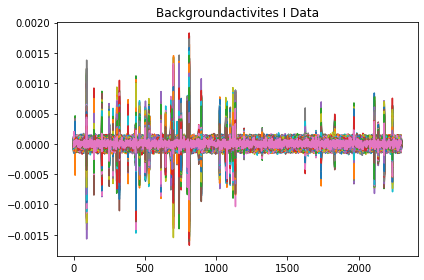

In [17]:
plt.plot(I_Data_BackgroundRFactivities)
plt.title("Backgroundactivites I Data")
plt.tight_layout()
plt.show()

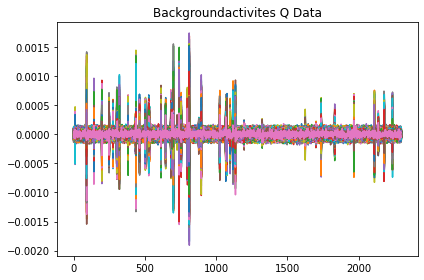

In [18]:
plt.plot(Q_Data_BackgroundRFactivities)
plt.title("Backgroundactivites Q Data")
plt.tight_layout()
plt.show()

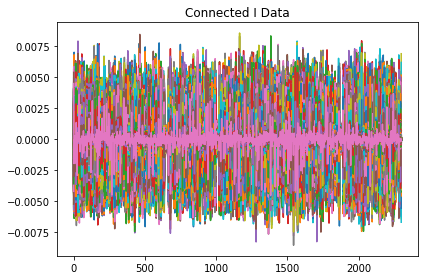

In [19]:
I_Data_Connected = Sticker_Connected_numpy[0:,0]
Q_Data_Connected = Sticker_Connected_numpy[0:,1]

I_Data_Connected= I_Data_Connected.reshape(NUMBER_OF_DATA,NUMBER_OF_FEATURES)
Q_Data_Connected= Q_Data_Connected.reshape(NUMBER_OF_DATA,NUMBER_OF_FEATURES)

Concatenate_IQ_Connected_2Dim = np.concatenate((I_Data_Connected,Q_Data_Connected),axis=1)

plt.plot(I_Data_Connected[0:])
plt.title("Connected I Data")
plt.tight_layout()
plt.show()

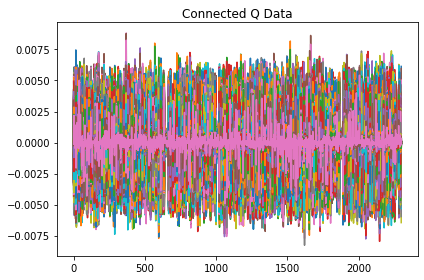

In [20]:
plt.plot(Q_Data_Connected[0:])
plt.title("Connected Q Data")
plt.tight_layout()
plt.show()

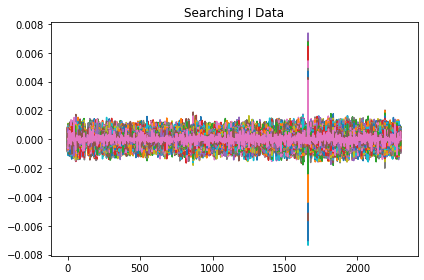

In [21]:
I_Data_Searching = Sticker_Searching_numpy[0:,0]
Q_Data_Searching = Sticker_Searching_numpy[0:,1]

I_Data_Searching= I_Data_Searching.reshape(NUMBER_OF_DATA,NUMBER_OF_FEATURES)
Q_Data_Searching= Q_Data_Searching.reshape(NUMBER_OF_DATA,NUMBER_OF_FEATURES)

Concatenate_IQ_Searching_2Dim = np.concatenate((I_Data_Searching,Q_Data_Searching),axis=1)


plt.plot(I_Data_Searching[0:3877])
plt.title("Searching I Data")
plt.tight_layout()
plt.show()

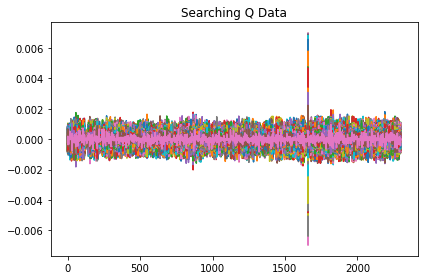

In [22]:
plt.plot(Q_Data_Searching)
plt.title("Searching Q Data")
plt.tight_layout()
plt.show()

In [23]:
I_Data_Searching_WIFI_established = Sticker_Searching_without_connected_numpy[0:,0]
Q_Data_Searching_WIFI_established = Sticker_Searching_without_connected_numpy[0:,1]

I_Data_Searching_WIFI_established= I_Data_Searching_WIFI_established.reshape(NUMBER_OF_DATA,NUMBER_OF_FEATURES)
Q_Data_Searching_WIFI_established= Q_Data_Searching_WIFI_established.reshape(NUMBER_OF_DATA,NUMBER_OF_FEATURES)

Concatenate_IQ_Searching_WIFI_established_2Dim = np.concatenate((I_Data_Searching_WIFI_established,Q_Data_Searching_WIFI_established),axis=1)


In [24]:
Concatenate_IQ_Searching_WIFI_established_2Dim.shape

(2301, 6774)

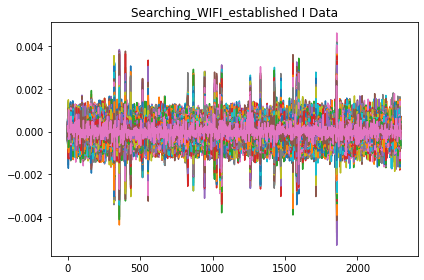

In [25]:
plt.plot(I_Data_Searching_WIFI_established[0:3877])
plt.title("Searching_WIFI_established I Data")
plt.tight_layout()
plt.show()

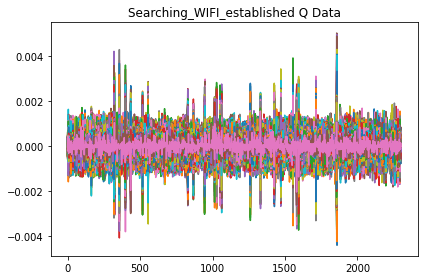

In [26]:
plt.plot(Q_Data_Searching_WIFI_established[0:3877])
plt.title("Searching_WIFI_established Q Data")
plt.tight_layout()
plt.show()

In [16]:
from sklearn.preprocessing import RobustScaler,StandardScaler

scaler_backgroundRFactivites = StandardScaler()
scaler_backgroundRFactivites_scaled = scaler_backgroundRFactivites.fit(Concatenate_IQ_BackgroundRFactivities_2Dim)
IQ_BackgroundRFactivites_numpy_scaled= scaler_backgroundRFactivites_scaled.transform(Concatenate_IQ_BackgroundRFactivities_2Dim)

scaler_connected = StandardScaler()
scaler_connected_scaled = scaler_connected.fit(Concatenate_IQ_Connected_2Dim)
IQ_connected_numpy_scaled= scaler_connected_scaled.transform(Concatenate_IQ_Connected_2Dim)


scaler_searching = StandardScaler()
scaler_searching_scaled = scaler_searching.fit(Concatenate_IQ_Searching_2Dim)
IQ_searching_numpy_scaled= scaler_backgroundRFactivites_scaled.transform(Concatenate_IQ_Searching_2Dim)

scaler_searching_WIFI_established = StandardScaler()
scaler_searching_WIFI_established_scaled = scaler_searching_WIFI_established.fit(Concatenate_IQ_Searching_WIFI_established_2Dim)
IQ_searching_WIFI_established_numpy_scaled= scaler_searching_WIFI_established_scaled.transform(Concatenate_IQ_Searching_WIFI_established_2Dim)

In [17]:
from sklearn.preprocessing import OneHotEncoder

Label =[['BackgroundRFactivities'],['Connected'],['Searching'],['Searching_WIFI_Establised']]

enc = OneHotEncoder(handle_unknown='ignore', sparse=False)

enc = enc.fit(Label)

Labelled = enc.transform(Label)

Labelled

array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.]])

In [18]:
np.random.seed(2016)

IQ_backgroundRFactivites_concatenate = np.tile(Labelled[0][np.newaxis,:],(IQ_BackgroundRFactivites_numpy_scaled.shape[0],1))
IQ_BackgroundRFactivites_dataset=np.concatenate((IQ_BackgroundRFactivites_numpy_scaled,IQ_backgroundRFactivites_concatenate),axis=1)
print("Connected dataset shape : " + str(IQ_BackgroundRFactivites_dataset.shape))

IQ_connected_concatenate = np.tile(Labelled[1][np.newaxis,:],(IQ_connected_numpy_scaled.shape[0],1))
IQ_connected_dataset=np.concatenate((IQ_connected_numpy_scaled,IQ_connected_concatenate),axis=1)
print("Connected dataset shape : " + str(IQ_connected_dataset.shape))

IQ_searching_concatenate = np.tile(Labelled[2][np.newaxis,:],(IQ_searching_numpy_scaled.shape[0],1))
IQ_searching_dataset=np.concatenate((IQ_searching_numpy_scaled,IQ_searching_concatenate),axis=1)
print("Connected dataset shape : " + str(IQ_searching_dataset.shape))

IQ_searching_wifi_established_concatenate = np.tile(Labelled[3][np.newaxis,:],(IQ_searching_WIFI_established_numpy_scaled.shape[0],1))
IQ_searching_wifi_established_dataset=np.concatenate((IQ_searching_WIFI_established_numpy_scaled,IQ_searching_wifi_established_concatenate),axis=1)
print("Connected dataset shape : " + str(IQ_searching_wifi_established_dataset.shape))

print('\n')
print(IQ_BackgroundRFactivites_dataset[0:5])
print('\n')
print(IQ_connected_dataset[0:5])
print('\n')
print(IQ_searching_dataset[0:5])
print('\n')
print(IQ_searching_wifi_established_dataset[0:5])

Connected dataset shape : (2301, 6778)
Connected dataset shape : (2301, 6778)
Connected dataset shape : (2301, 6778)
Connected dataset shape : (2301, 6778)


[[ 0.74707273  0.17999577  1.08564825 ...  0.          0.
   0.        ]
 [-0.72741107  0.07051169  0.04505159 ...  0.          0.
   0.        ]
 [ 0.34470854  0.06431825 -0.79458633 ...  0.          0.
   0.        ]
 [ 2.35142011  0.38597768  0.08720673 ...  0.          0.
   0.        ]
 [ 0.36408163  1.09183031 -0.01712242 ...  0.          0.
   0.        ]]


[[-0.01945634  0.04483514  0.17509273 ...  1.          0.
   0.        ]
 [ 5.4336447   2.05710721 -2.0711636  ...  1.          0.
   0.        ]
 [ 3.58964372  4.49853841  3.71236771 ...  1.          0.
   0.        ]
 [-0.50096334  1.80428104  3.19929127 ...  1.          0.
   0.        ]
 [-0.76890541 -0.58577022 -0.2557556  ...  1.          0.
   0.        ]]


[[  0.36535898   0.2643065   -1.04154998 ...   0.           1.
    0.        ]
 [  6.88174285   3.79596713

In [19]:
import copy

stacked_data=np.vstack((IQ_BackgroundRFactivites_dataset,IQ_connected_dataset,IQ_searching_dataset,IQ_searching_wifi_established_dataset))
Dataset_Label_shuffled = copy.copy(stacked_data)
np.random.shuffle(Dataset_Label_shuffled)

In [20]:
length_of_X_train = int(0.7*Dataset_Label_shuffled.shape[0]) #94836
length_of_X_validation = (int(0.2*Dataset_Label_shuffled.shape[0]))+length_of_X_train #27096 #121932
print(length_of_X_validation)

8282


In [21]:
Train_Dataset = Dataset_Label_shuffled[0:length_of_X_train,0:6774]
print(Train_Dataset.shape)
Y_Train_Dataset = Dataset_Label_shuffled[0:length_of_X_train,6774:]
print(Y_Train_Dataset)

(6442, 6774)
[[0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 ...
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]]


In [22]:
Validation_Dataset = Dataset_Label_shuffled[length_of_X_train:length_of_X_validation,0:6774]
Y_Validation_Dataset = Dataset_Label_shuffled[length_of_X_train:length_of_X_validation,6774:]
print(Validation_Dataset.shape)

(1840, 6774)


In [23]:
Train_Dataset=Train_Dataset.reshape(6442,6774,1)
Validation_Dataset=Validation_Dataset.reshape(1840,6774,1)
print(Validation_Dataset.shape)

(1840, 6774, 1)


In [24]:
  
import keras
import keras.models as models
from keras.layers.convolutional import Conv2D, MaxPooling2D, ZeroPadding2D, Conv1D, MaxPooling1D
from keras.layers.core import Flatten, Dense, Dropout, Activation, Reshape

def getBaselineModel(slice_size, classes=4, cnn_stacks=3, fc_stacks=1, channels=128, dropout_flag=True, \
                        fc1=256, fc2=128, batchnorm=False, \
                        #optimizer = Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False), \
                        loss='categorical_crossentropy'):
    """A dummy model to test the functionalities of the Data Generator"""
    model = models.Sequential()
    model.add(Conv1D(channels,7,activation='relu', padding='same', input_shape=(slice_size, 1)))
    model.add(Conv1D(channels,5, padding='same'))
    if batchnorm:
        model.add(keras.layers.BatchNormalization(momentum=0.9, name='bn_1'))
    model.add(Activation('relu'))
    model.add(MaxPooling1D())
    for i in range(1, cnn_stacks):
        model.add(Conv1D(channels,7,activation='relu', padding='same'))
        model.add(Conv1D(channels,5, padding='same'))
        if batchnorm:
            model.add(keras.layers.BatchNormalization(momentum=0.9, name='bn_'+str(i+1)))
        model.add(Activation('relu'))
        model.add(MaxPooling1D())
    #model.add(Conv1D(128,7,activation='relu', padding='same'))
    #model.add(Conv1D(128,5,activation='relu', padding='same'))
    #model.add(MaxPooling1D())
    model.add(Flatten())
    for j in range(1, fc_stacks):
        model.add(Dense(fc1, activation='relu'))
        if dropout_flag:
            model.add(Dropout(0.5))
    model.add(Dense(fc2, activation='relu'))
    if dropout_flag:
        model.add(Dropout(0.5))
    model.add(Dense(classes, activation='softmax'))

    #optimizer = optimizer
    #optimizer = Adam(lr=lr, beta_1=beta_2, beta_2=beta_2, epsilon=epsilon, decay=decay, amsgrad=amsgrad)
    #model.compile(loss=loss, optimizer=optimizer, metrics=['accuracy'])
    model.summary()

    return model

In [25]:
model= getBaselineModel(slice_size=6774)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 6774, 128)         1024      
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 6774, 128)         82048     
_________________________________________________________________
activation (Activation)      (None, 6774, 128)         0         
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 3387, 128)         0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 3387, 128)         114816    
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 3387, 128)         82048     
_________________________________________________________________
activation_1 (Activation)    (None, 3387, 128)         0

In [26]:
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [27]:
history3 = model.fit(Train_Dataset, Y_Train_Dataset, epochs=6000, batch_size=100,validation_data=(Validation_Dataset, Y_Validation_Dataset),
    callbacks = [keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, verbose=0, mode='auto')])

Epoch 1/6000
65/65 [==============================] - 21s 325ms/step - loss: 0.9115 - accuracy: 0.6000 - val_loss: 0.3208 - val_accuracy: 0.9103
Epoch 2/6000
65/65 [==============================] - 21s 318ms/step - loss: 0.2865 - accuracy: 0.9218 - val_loss: 0.1812 - val_accuracy: 0.9658
Epoch 3/6000
65/65 [==============================] - 21s 321ms/step - loss: 0.1658 - accuracy: 0.9589 - val_loss: 0.1307 - val_accuracy: 0.9668
Epoch 4/6000
65/65 [==============================] - 21s 322ms/step - loss: 0.1469 - accuracy: 0.9634 - val_loss: 0.1282 - val_accuracy: 0.9674
Epoch 5/6000
65/65 [==============================] - 21s 324ms/step - loss: 0.1372 - accuracy: 0.9654 - val_loss: 0.1227 - val_accuracy: 0.9690
Epoch 6/6000
65/65 [==============================] - 21s 325ms/step - loss: 0.1301 - accuracy: 0.9666 - val_loss: 0.1251 - val_accuracy: 0.9674
Epoch 7/6000
65/65 [==============================] - 21s 326ms/step - loss: 0.1238 - accuracy: 0.9688 - val_loss: 0.1146 - val_ac

In [28]:
_, accuracy_test = model.evaluate(Validation_Dataset, Y_Validation_Dataset)
print('Accuracy: %.2f' % (accuracy_test*100))

58/58 [==============================] - 2s 38ms/step - loss: 0.1711 - accuracy: 0.9663
Accuracy: 96.63


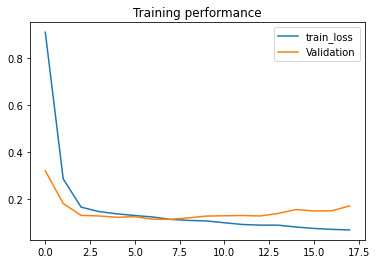

In [29]:
plt.figure()
plt.title('Training performance')
plt.plot(history3.history['loss'], label='train_loss')
plt.plot(history3.history['val_loss'], label='Validation')
plt.legend()
plt.show()

In [31]:
model.save("{MODEL Second RFMLS} Fourth_Sticker_TRAINED")

INFO:tensorflow:Assets written to: {MODEL Second RFMLS} Fourth_Sticker_TRAINED/assets


In [ ]:
path_Fourth_sticker='../../Second Dataset collected on 16 December 2020/Pre-processed file/Fourth_Sticker'

# Second Attempt Trained Model

### Using First Sticker Model as Trained Model

In [38]:
from tensorflow import keras
load_first_sticker_model = keras.models.load_model("{MODEL Second RFMLS} First_Sticker_TRAINED")
_,accuracy=load_first_sticker_model.evaluate(Validation_Dataset,Y_Validation_Dataset)
print(accuracy*100)

58/58 [==============================] - 2s 36ms/step - loss: 1.7870 - accuracy: 0.5663
56.63043260574341


### Using Second Sticker Model as Trained Model

In [47]:
from tensorflow import keras
load_second_sticker_model = keras.models.load_model("{MODEL Second RFMLS} Second_Sticker_TRAINED")
_,accuracy=load_second_sticker_model.evaluate(Validation_Dataset,Y_Validation_Dataset)
print(accuracy*100)

58/58 [==============================] - 2s 36ms/step - loss: 0.7947 - accuracy: 0.7554
75.54348111152649


### Using Third Sticker Model as Trained Model

In [46]:
from tensorflow import keras
load_Third_sticker_model = keras.models.load_model("{MODEL Second RFMLS} Third_Sticker_TRAINED")
_,accuracy=load_Third_sticker_model.evaluate(Validation_Dataset,Y_Validation_Dataset)
print(accuracy*100)

58/58 [==============================] - 2s 36ms/step - loss: 0.2092 - accuracy: 0.9636
96.35869860649109


### Using Fourth Sticker Model as Trained Model

In [48]:
from tensorflow import keras
load_fourth_sticker_model = keras.models.load_model("{MODEL Second RFMLS} Fourth_Sticker_TRAINED")
_,accuracy=load_fourth_sticker_model.evaluate(Validation_Dataset,Y_Validation_Dataset)
print(accuracy*100)

58/58 [==============================] - 2s 36ms/step - loss: 0.1711 - accuracy: 0.9663
96.6304361820221


### Using Fifth Sticker Model as Trained Model

In [49]:
from tensorflow import keras
load_fifth_sticker_model = keras.models.load_model("{MODEL Second RFMLS} Fifth_Sticker_TRAINED")
_,accuracy=load_fifth_sticker_model.evaluate(Validation_Dataset,Y_Validation_Dataset)
print(accuracy*100)

58/58 [==============================] - 2s 36ms/step - loss: 0.1341 - accuracy: 0.9668
96.6847836971283


# First Attempt trained model

### Using First Model as Trained Model

In [27]:
from tensorflow import keras
load_first_sticker_model = keras.models.load_model("../../First Dataset collected on 3 December 2020/Machine Learning with RFMLS Model (ConV1D)/{MODEL First RFMLS} First_Sticker_TRAINED")
_,accuracy=load_first_sticker_model.evaluate(Validation_Dataset,Y_Validation_Dataset)
print(accuracy*100)

58/58 [==============================] - 2s 35ms/step - loss: 3.7633 - accuracy: 0.5690
56.90217614173889


### Using Third Model as Trained Model

In [28]:
from tensorflow import keras
load_third_sticker_model = keras.models.load_model("../../First Dataset collected on 3 December 2020/Machine Learning with RFMLS Model (ConV1D)/{MODEL First RFMLS} Third_Sticker_TRAINED")
_,accuracy=load_third_sticker_model.evaluate(Validation_Dataset,Y_Validation_Dataset)
print(accuracy*100)

58/58 [==============================] - 2s 35ms/step - loss: 6.7306 - accuracy: 0.6451
64.5108699798584


### Using Fourth Model as Trained Model

In [26]:
from tensorflow import keras
load_fourth_sticker_model = keras.models.load_model("../../First Dataset collected on 3 December 2020/Machine Learning with RFMLS Model (ConV1D)/{MODEL First RFMLS} Fourth_Sticker_TRAINED")
_,accuracy=load_fourth_sticker_model.evaluate(Validation_Dataset,Y_Validation_Dataset)
print(accuracy*100)

58/58 [==============================] - 2s 34ms/step - loss: 9.2640 - accuracy: 0.6614
66.14130139350891


### Using Fifth Model as Trained Model

In [27]:
from tensorflow import keras
load_fifth_sticker_model = keras.models.load_model("../../First Dataset collected on 3 December 2020/Machine Learning with RFMLS Model (ConV1D)/{MODEL First RFMLS} Fifth_Sticker_TRAINED")
_,accuracy=load_fifth_sticker_model.evaluate(Validation_Dataset,Y_Validation_Dataset)
print(accuracy*100)

58/58 [==============================] - 2s 35ms/step - loss: 11.2415 - accuracy: 0.6440
64.402174949646
